# Bellabeat Case Study

## Scenario
Welcome to the Bellabeat Case study. In this project, I am playing the part of a Junior Analyst, who is analyzing the fitness data of smart devices to help unlock the growth opportunities for Bellabeat company, discover insight from the data and make recommendations for their marketing strategy.

## About the Company

Bellabeat is a high-tech company that manufactures health-focused smart products for women such as the Bellabeat app, Leaf, Time, and Spring. The company was founded in 2013 by Urška Sršen and Sando Mur and by the time of 2016, Bellabeat launched multiple products and enter the global market. With all these smart devices Bellabeat also has a subscription model in which Bellabeat offers the user a subscription-based membership program, giving them access to personalized guidance on having a healthy lifestyle.

## Key Stakeholders

**Urška Sršen:** Bellabeat's co-founder and Chief Creative Oﬃcer

**Sando Mur:** Mathematician and Bellabeat's co-founder; key member of the Bellabeat executive team

**Bellabeat marketing analytics team:** A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat's marketing strategy.

## About the Data

**Crowd-sourced Fitbit datasets 04.12.2016-05.12.2016:** These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.

# Limitation And Fact About the Data

* On the dataset instead of 30 participants, 33 Fitbit users took part in this survey. However, the dataset may not be able to represent the target population.
* The dataset only covered the period between 2016-04-12 and 2016-05-12.
* This is third-party data collected using Amazon Mechanical Turk.
* There is no metadata of the dataset.
* The data is collected six years ago and it is not as current as it could be for the analysis.

## Data And Tool Selection
In this analysis I am using the R language for data processign, data analysis and data visualization.The dataset has the following 18 files in .csv format.

1. dailyActivity_merged.csv
2. dailyCalories_merged.csv
3. dailyIntensities_merged.csv
4. dailySteps_merged.csv
5. heartrate_seconds_merged.csv
6. hourlyCalories_merged.csv
7. hourlyIntensities_merged.csv
8. hourlySteps_merged.csv
9. minuteCaloriesNarrow_merged.csv
10. minuteCaloriesWide_merged.csv
11. minuteIntensitiesNarrow_merged.csv
12. minuteIntensitiesWide_merged.csv
13. minuteMETsNarrow_merged.csv
14. minuteSleep_merged.csv
15. minuteStepsNarrow_merged.csv
16. minuteStepsWide_merged.csv
17. sleepDay_merged.csv
18. weightLogInfo_merged

# 1. Ask Phase
Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart
devices.
These are the questions will guide following analysis:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?


# 2. Prepare and Process
#### 2.1. Install the Package and library 






In [1]:
#install.packages("tidyverse")
#install.packages("lubridate")
#install.packages("skimr")
#install.packages("readr")
#install.packages("dplyr")
#install.packages("skimr")
#install.packages("ggplot2")

library(tidyverse)
library(lubridate)
library(skimr)
library(readr)
library(dplyr)
library(skimr)
library(ggplot2)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




#### 2.2.Importing datasets¶


In [2]:
#Loading the data frame

daily_activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
intensity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")

Rows: 940 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 413 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 940 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, Ve...


ℹ Use `spec()` to retrieve the full col

#### 2.3 Veiw Data structure
Inspecting the data and checking the structure of the data frame using function like head(), glimps(), str() and skim_without_charts(). 

In [3]:
head(daily_activity)
head(sleep)
head(intensity)

str(daily_activity)
str(sleep)
str(intensity)

skim_without_charts(daily_activity)
skim_without_charts(sleep)
skim_without_charts(intensity)


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


spec_tbl_df [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 22

#### 2.4 Correcting the format of the data

After observing the above data, we can notice that the DateTime data in all the data frames is string type. And now it's necessary to convert them to date/time format. 

In [4]:
daily_activity2 <- daily_activity %>%
    mutate(ActivityDate = as.Date(ActivityDate, "%m/%d/%Y")) %>%
    rename(Date= ActivityDate)


In [5]:
sleep2 <- sleep %>%
  mutate(SleepDay= as.Date(SleepDay, "%m/%d/%y ")) %>%
  rename(Date= SleepDay)




In [6]:
intensity2 <- intensity %>%
    mutate(ActivityDay = as.Date(ActivityDay, "%m/%d/%Y")) %>%
    rename(Date= ActivityDay)


##### Validating if date changes to String type to DateTime type.

In [7]:
head(daily_activity2)
head(sleep2)
head(intensity2)

Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2020-04-12,1,327,346
1503960366,2020-04-13,2,384,407
1503960366,2020-04-15,1,412,442
1503960366,2020-04-16,2,340,367
1503960366,2020-04-17,1,700,712
1503960366,2020-04-19,1,304,320


Id,Date,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,728,328,13,25,0,6.06,0.55,1.88
1503960366,2016-04-13,776,217,19,21,0,4.71,0.69,1.57
1503960366,2016-04-14,1218,181,11,30,0,3.91,0.40,2.44
1503960366,2016-04-15,726,209,34,29,0,2.83,1.26,2.14
1503960366,2016-04-16,773,221,10,36,0,5.04,0.41,2.71
1503960366,2016-04-17,539,164,20,38,0,2.51,0.78,3.19


#### 2.5 Checking for Duplicates

In [8]:
sum(duplicated(daily_activity2))
sum(duplicated(sleep2))
sum(duplicated(intensity2))

[1] 0

[1] 3

[1] 0

* Sleep2 date frame has the 3 duplicate value, Now removing the dulpicate from the sleep2 data frame

In [9]:
#Remove duplicate
sleep2 <- sleep2 %>%
 distinct()

#### 2.6 Checking for NA values in Data Frame
Checking and removing any row which conating the NA data value in all three data frames.

In [10]:
sum(is.na(daily_activity2))
sum(is.na(sleep2))
sum(is.na(intensity2))

[1] 0

[1] 0

[1] 0

* Any of the row from all three data frame is not containg the NA data values.

#### 2.7 Summary statistics.
Checking for how many unique participants are in the dataset

In [11]:
n_distinct(daily_activity2$Id)
n_distinct(sleep2$Id)
n_distinct(intensity2$Id)

[1] 33

[1] 24

[1] 33

This gives us some inconsistencies. The daily_activity2 and intensity2 data shows us a value of 33, indicating that some participant(s) made multiple accounts. It also shows us that not every participant was using every function. However, since the extra accounts have data associated with them, it is impossible to tell which IDs are the duplicate accounts.

##### Summary of daily_activity2 dataset

In [12]:
daily_activity2 %>% 
  select(Date,TotalSteps,TotalDistance,SedentaryMinutes,Calories) %>%
  summary()

      Date              TotalSteps    TotalDistance    SedentaryMinutes
 Min.   :2016-04-12   Min.   :    0   Min.   : 0.000   Min.   :   0.0  
 1st Qu.:2016-04-19   1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8  
 Median :2016-04-26   Median : 7406   Median : 5.245   Median :1057.5  
 Mean   :2016-04-26   Mean   : 7638   Mean   : 5.490   Mean   : 991.2  
 3rd Qu.:2016-05-04   3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5  
 Max.   :2016-05-12   Max.   :36019   Max.   :28.030   Max.   :1440.0  
    Calories   
 Min.   :   0  
 1st Qu.:1828  
 Median :2134  
 Mean   :2304  
 3rd Qu.:2793  
 Max.   :4900  

In [13]:
sleep2 %>%
  select(Date,TotalSleepRecords, TotalMinutesAsleep ) %>%
  summary()

      Date            TotalSleepRecords TotalMinutesAsleep
 Min.   :2020-04-12   Min.   :1.00      Min.   : 58.0     
 1st Qu.:2020-04-19   1st Qu.:1.00      1st Qu.:361.0     
 Median :2020-04-27   Median :1.00      Median :432.5     
 Mean   :2020-04-26   Mean   :1.12      Mean   :419.2     
 3rd Qu.:2020-05-04   3rd Qu.:1.00      3rd Qu.:490.0     
 Max.   :2020-05-12   Max.   :3.00      Max.   :796.0     

In [14]:
intensity2 %>%
  select(Date, Date,SedentaryMinutes,
         LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes) %>%
        summary()

      Date            SedentaryMinutes LightlyActiveMinutes FairlyActiveMinutes
 Min.   :2016-04-12   Min.   :   0.0   Min.   :  0.0        Min.   :  0.00     
 1st Qu.:2016-04-19   1st Qu.: 729.8   1st Qu.:127.0        1st Qu.:  0.00     
 Median :2016-04-26   Median :1057.5   Median :199.0        Median :  6.00     
 Mean   :2016-04-26   Mean   : 991.2   Mean   :192.8        Mean   : 13.56     
 3rd Qu.:2016-05-04   3rd Qu.:1229.5   3rd Qu.:264.0        3rd Qu.: 19.00     
 Max.   :2016-05-12   Max.   :1440.0   Max.   :518.0        Max.   :143.00     
 VeryActiveMinutes
 Min.   :  0.00   
 1st Qu.:  0.00   
 Median :  4.00   
 Mean   : 21.16   
 3rd Qu.: 32.00   
 Max.   :210.00   

* By looking at all the dataset summaries, I notice something on the sleep2 dataset.
* I added a new column on the sleep2 dataset by the name of the sleep_category, and I divide sleep into three factors low_sleep which is lower than 420min or 7hour, normal_sleep which is between 420-540(7 to 9 hours), and over_sleep more than 540 or 9 hours.

In [15]:
# categorising the sleep type
sleep2$sleep_category <- cut(sleep2$TotalMinutesAsleep,c(-Inf,420,540,Inf), c("low_sleep", "normal_sleep", "over_sleep"))

In [16]:
head(sleep2)

Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,sleep_category
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<fct>
1503960366,2020-04-12,1,327,346,low_sleep
1503960366,2020-04-13,2,384,407,low_sleep
1503960366,2020-04-15,1,412,442,low_sleep
1503960366,2020-04-16,2,340,367,low_sleep
1503960366,2020-04-17,1,700,712,over_sleep
1503960366,2020-04-19,1,304,320,low_sleep


Successfully added the sleep category column on the sleep2 dataset.

# 3. Analyze and Share
The daily_activity2 dataset contains all the data of the intensity2 dataset, So I am merging the dataset daily_activity2 and sleep2 datasets.

#### 3.1 Merging the Dataset

In [17]:
#merging the datasets
combine_data <- inner_join(daily_activity2,sleep2, by= "Id", "Date")


In [18]:
head(combine_data)

Id,Date.x,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Date.y,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,sleep_category
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<fct>
1503960366,2016-04-12,13162,8.5,8.5,0,1.88,0.55,6.06,0,25,13,328,728,1985,2020-04-12,1,327,346,low_sleep
1503960366,2016-04-12,13162,8.5,8.5,0,1.88,0.55,6.06,0,25,13,328,728,1985,2020-04-13,2,384,407,low_sleep
1503960366,2016-04-12,13162,8.5,8.5,0,1.88,0.55,6.06,0,25,13,328,728,1985,2020-04-15,1,412,442,low_sleep
1503960366,2016-04-12,13162,8.5,8.5,0,1.88,0.55,6.06,0,25,13,328,728,1985,2020-04-16,2,340,367,low_sleep
1503960366,2016-04-12,13162,8.5,8.5,0,1.88,0.55,6.06,0,25,13,328,728,1985,2020-04-17,1,700,712,over_sleep
1503960366,2016-04-12,13162,8.5,8.5,0,1.88,0.55,6.06,0,25,13,328,728,1985,2020-04-19,1,304,320,low_sleep


#### What is the relationship between Total Steps and calories burn.

In [19]:
cor.test(combine_data$TotalSteps, combine_data$Calories)


	Pearson's product-moment correlation

data:  combine_data$TotalSteps and combine_data$Calories
t = 55.41, df = 12346, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4320346 0.4602874
sample estimates:
      cor 
0.4462722 


It shows the positive relationship between Total Steps and calorie burn.

#### What is the relationship between Very Active Minutes and Sedentary Minutes

In [20]:
cor.test(combine_data$VeryActiveMinutes, combine_data$SedentaryMinutes)


	Pearson's product-moment correlation

data:  combine_data$VeryActiveMinutes and combine_data$SedentaryMinutes
t = -15.824, df = 12346, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1582349 -0.1236593
sample estimates:
       cor 
-0.1409901 


#### What is the relationship between TotalMinutesAsleep and SedentaryMinutes.

In [21]:
cor.test(combine_data$SedentaryMinutes, combine_data$TotalMinutesAsleep)


	Pearson's product-moment correlation

data:  combine_data$SedentaryMinutes and combine_data$TotalMinutesAsleep
t = -13.841, df = 12346, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1409436 -0.1062058
sample estimates:
       cor 
-0.1236126 


It shows the negative relationship between SedentaryMinutes and TotalMinutesAsleep.

# Data Visualization 

#### Creating a plot of TotalMinutesAsleep and SedentaryMinutes

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



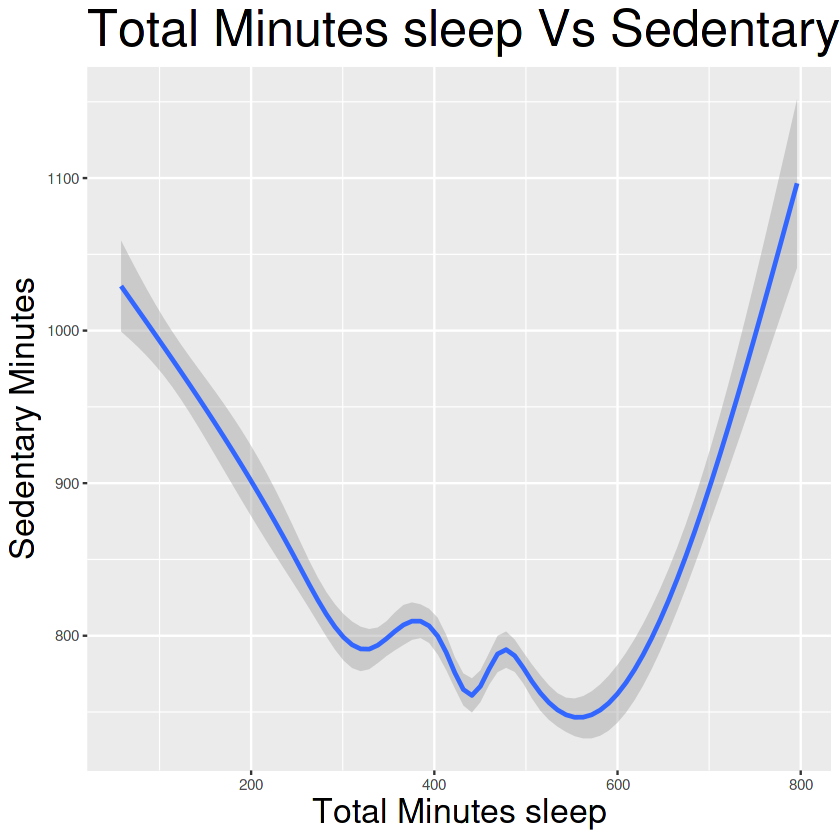

In [22]:
ggplot(data= combine_data,mapping= aes(x=TotalMinutesAsleep, y=  SedentaryMinutes),color= "blue")+ geom_smooth()+
labs(title= "Total Minutes sleep Vs Sedentary Minutes", x="Total Minutes sleep",y="Sedentary Minutes")+
theme(plot.title = element_text(size = 30),axis.title= element_text(size=20))

* From the above Plot, I can say that there is a negative correlation between Sedentary minutes and total minutes sleep. And it is by analyzing the graph I can say that having a sedentary or inactive lifestyle affects the quality of sleep and consequently has an effect on stress & fatigue.

* As part of the Wellness mandate of the company, they can create a prompt that compares sleep and sedentary minutes where the users can track their quality of sleep against their activity.




#### Creating a plot of Total Steps and Calories burn.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



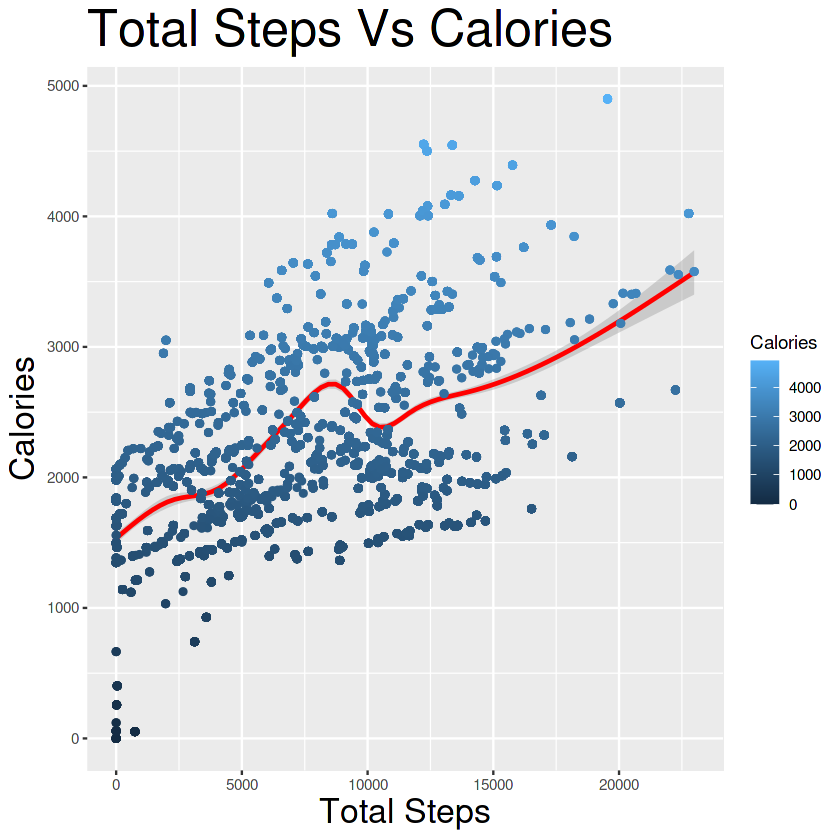

In [23]:
ggplot(data= combine_data, mapping = aes(x=TotalSteps,y=Calories)) + geom_smooth (color= "red")+ 
geom_point(aes(color= Calories))+ labs(title= "Total Steps Vs Calories", x= "Total Steps", y= "Calories")+
theme(plot.title = element_text(size = 30),axis.title= element_text(size=20))

* It is noticed that there is a  positive correlation between Total steps taken and calories burned. And with the analysis of the plot, I can say that if a person walks more, he is very likely to lose weight.
* And for marketing team, Bellabeat can set up a leaderboard in its Bellabeat time wellness watch in which users have a target for total steps with a leaderboard for each level and users can see their performance on the Bellabeat app. And the leader or top five contestants of the leaderboard could have some discount on the monthly membership according to their position.

#### Creating a plot of User Sleeping Behaviour

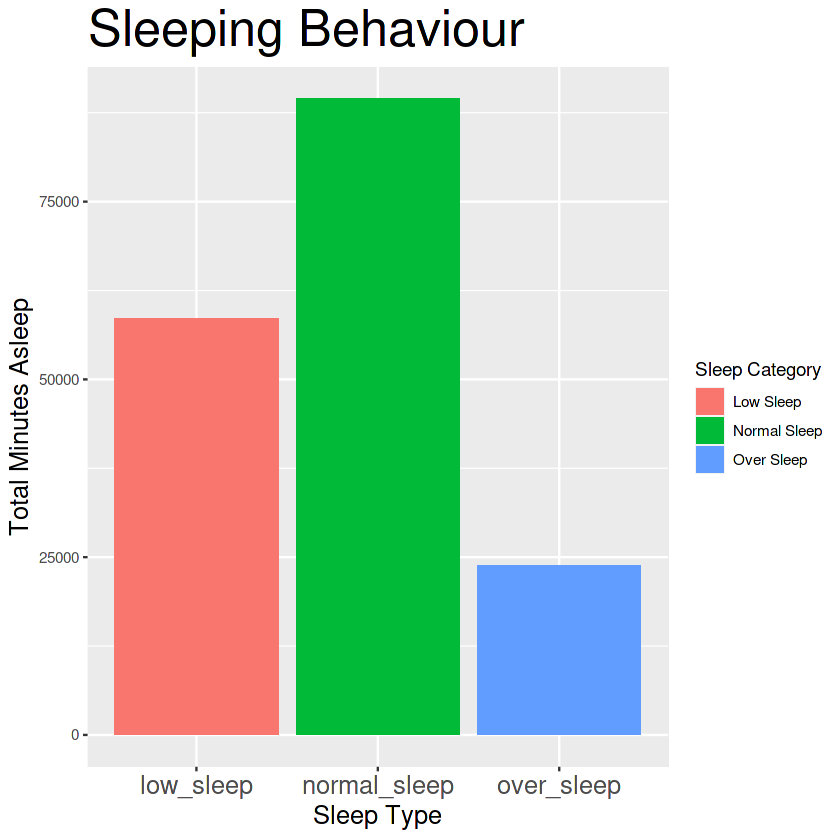

In [24]:
ggplot(data= sleep2, mapping = aes(x=sleep_category,y=TotalMinutesAsleep, fill= sleep_category))+ geom_col()+
labs(title= "Sleeping Behaviour", x= "Sleep Type", y= "Total Minutes Asleep",legends= "sleep category" )+ 
scale_fill_discrete(name="Sleep Category", labels= c("Low Sleep", "Normal Sleep", "Over Sleep"))+
theme(plot.title = element_text(size = 30),axis.title= element_text(size=15), axis.text.x = element_text(size = 15))

* Most of the users have the normal sleeping type, but also many users suffer from low sleep because of their unhealthy lifestyle, uneven sleeping habits, and health issues.
*  For the Bellabeat team, they can simply show the user a pop-up warning message about their low sleeping or oversleeping behavior on their fitness watch or Bellabeat mobile application,  And they can suggest users some kind of exercise or health course to maintain their normal sleep.

#### Which day of the week users are most active.
Adding a new column name weekday, In the column, the weekday name is associated with the date of that day. After adding the column we can check which day the user is most active and make a visual presentation of that.

In [25]:
# Adding new weekday column on combine_data dataset
intensity2$weekday <- weekdays(intensity2$Date)

In [26]:
# Checking the dataset
head(intensity2)

Id,Date,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,weekday
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,728,328,13,25,0,6.06,0.55,1.88,Tuesday
1503960366,2016-04-13,776,217,19,21,0,4.71,0.69,1.57,Wednesday
1503960366,2016-04-14,1218,181,11,30,0,3.91,0.40,2.44,Thursday
1503960366,2016-04-15,726,209,34,29,0,2.83,1.26,2.14,Friday
1503960366,2016-04-16,773,221,10,36,0,5.04,0.41,2.71,Saturday
1503960366,2016-04-17,539,164,20,38,0,2.51,0.78,3.19,Sunday


In [27]:
# Rearranging the weekdays in chronological order
intensity2$weekday <- factor(intensity2$weekday, c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

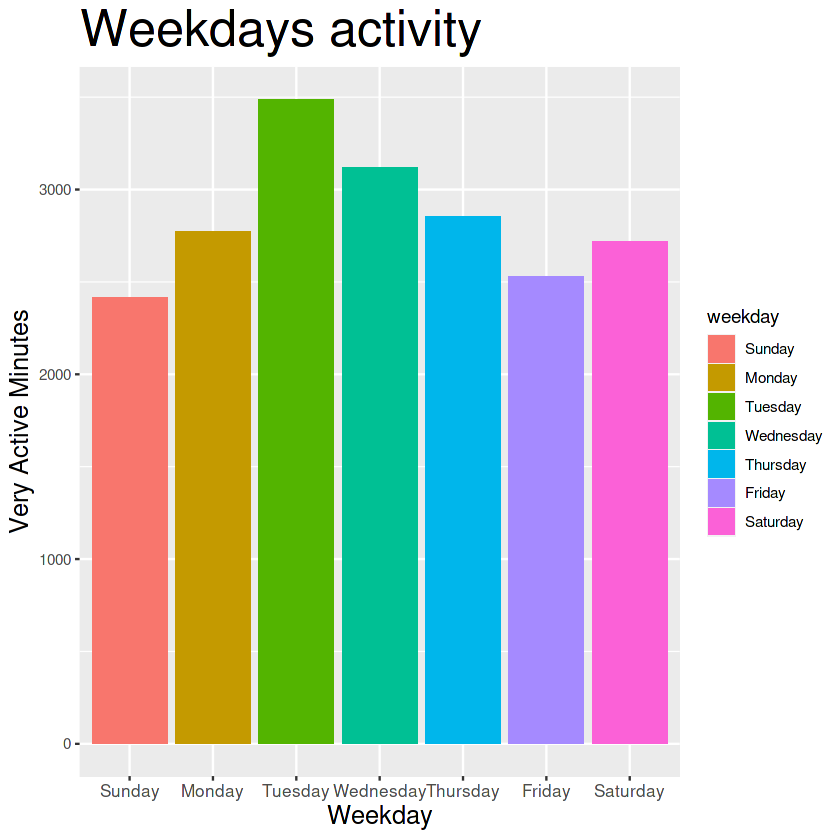

In [28]:
# Creating the plot
ggplot(data= intensity2,aes(x= weekday, y=VeryActiveMinutes, fill= weekday))+geom_col()+ 
labs(title="Weekdays activity",x="Weekday", y="Very Active Minutes", legends= "Weekdays")+
theme(plot.title = element_text(size = 30),axis.title= element_text(size=15), axis.text.x = element_text(size = 10))

* The users seem to be active in the middle of the week and on the weekend user seems to be less active as compared to the weekdays.
* Bellabeat can set up a reminder or a special weekend event on Bellabeat Time and give a target to achieve on the weekend.